<a href="https://colab.research.google.com/github/nubialmeida/Projeto-pyspark/blob/main/Projeto_An%C3%A1lise_de_Dados_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação da lib

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Declaração das libs

In [3]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Montando drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Configuração da sessão Spark

In [4]:

spark = (SparkSession.builder
                     .master('local')
                     .appName('Analise_MBA')
                     .config('spark.ui.port', '4050')
                     .getOrCreate())

In [5]:
#Criando os dataframes a partir de datasets
df_aisles = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/TI/aisles.csv'))

In [6]:
#Criando os dataframes a partir de datasets
df_departments = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/TI/departments.csv'))

In [7]:
#Criando os dataframes a partir de datasets
df_orders = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/TI/orders.csv'))

In [8]:
#Criando os dataframes a partir de datasets
df_products = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/TI/products.csv'))

In [9]:
#Criando os dataframes a partir de datasets
df_order_product_prior = (spark.read.format('csv')
                       .option('delimiter', ',')
                       .option('header', 'true')
                       .option('inferschema', 'true')
                       .load('/content/drive/MyDrive/TI/order_products__prior.csv'))

##Análise exploratória

In [10]:
#Shape aisle
print(f'({df_aisles.count()}, {len(df_aisles.columns)})')

(134, 2)


In [11]:
#Analisando o esquema dos dados
df_aisles.printSchema()

root
 |-- aisle_id: integer (nullable = true)
 |-- aisle: string (nullable = true)



In [12]:
#Amostra de dados da tabela aisles
df_aisles.show(truncate=False)

+--------+----------------------------+
|aisle_id|aisle                       |
+--------+----------------------------+
|1       |prepared soups salads       |
|2       |specialty cheeses           |
|3       |energy granola bars         |
|4       |instant foods               |
|5       |marinades meat preparation  |
|6       |other                       |
|7       |packaged meat               |
|8       |bakery desserts             |
|9       |pasta sauce                 |
|10      |kitchen supplies            |
|11      |cold flu allergy            |
|12      |fresh pasta                 |
|13      |prepared meals              |
|14      |tofu meat alternatives      |
|15      |packaged seafood            |
|16      |fresh herbs                 |
|17      |baking ingredients          |
|18      |bulk dried fruits vegetables|
|19      |oils vinegars               |
|20      |oral hygiene                |
+--------+----------------------------+
only showing top 20 rows



In [13]:
#Shape departments
print(f'({df_departments.count()}, {len(df_departments.columns)})')

(21, 2)


In [14]:
#Analisando o esquema dos dados
df_departments.printSchema()

root
 |-- department_id: integer (nullable = true)
 |-- department: string (nullable = true)



In [15]:
#Amostra de dados da tabela departments
df_departments.show(truncate=False)

+-------------+---------------+
|department_id|department     |
+-------------+---------------+
|1            |frozen         |
|2            |other          |
|3            |bakery         |
|4            |produce        |
|5            |alcohol        |
|6            |international  |
|7            |beverages      |
|8            |pets           |
|9            |dry goods pasta|
|10           |bulk           |
|11           |personal care  |
|12           |meat seafood   |
|13           |pantry         |
|14           |breakfast      |
|15           |canned goods   |
|16           |dairy eggs     |
|17           |household      |
|18           |babies         |
|19           |snacks         |
|20           |deli           |
+-------------+---------------+
only showing top 20 rows



In [16]:
#Shape orders
print(f'({df_orders.count()}, {len(df_orders.columns)})')

(3421083, 7)


In [17]:
#Analisando o esquema dos dados
df_orders.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable = true)



In [18]:
#Amostra da tabela orders
df_orders.show(truncate=False)

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
|2539329 |1      |prior   |1           |2        |8                |null                  |
|2398795 |1      |prior   |2           |3        |7                |15.0                  |
|473747  |1      |prior   |3           |3        |12               |21.0                  |
|2254736 |1      |prior   |4           |4        |7                |29.0                  |
|431534  |1      |prior   |5           |4        |15               |28.0                  |
|3367565 |1      |prior   |6           |2        |7                |19.0                  |
|550135  |1      |prior   |7           |1        |9                |20.0                  |
|3108588 |1      |prior   |8           |1        |14               |14.0        

In [19]:
#Shape products
print(f'({df_products.count()}, {len(df_products.columns)})')

(49688, 4)


In [20]:
#Analisa o esquema dos dados
df_products.printSchema()

root
 |-- product_id: integer (nullable = true)
 |-- product_name: string (nullable = true)
 |-- aisle_id: string (nullable = true)
 |-- department_id: string (nullable = true)



In [21]:
#Amostra dos dados da tabela products
df_products.show(truncate=False)

+----------+-----------------------------------------------------------------+--------+-------------+
|product_id|product_name                                                     |aisle_id|department_id|
+----------+-----------------------------------------------------------------+--------+-------------+
|1         |Chocolate Sandwich Cookies                                       |61      |19           |
|2         |All-Seasons Salt                                                 |104     |13           |
|3         |Robust Golden Unsweetened Oolong Tea                             |94      |7            |
|4         |Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce|38      |1            |
|5         |Green Chile Anytime Sauce                                        |5       |13           |
|6         |Dry Nose Oil                                                     |11      |11           |
|7         |Pure Coconut Water With Orange                                   |98  

In [22]:
#Shape order_product_prior
print(f'({df_order_product_prior.count()}, {len(df_order_product_prior.columns)})')

(32492309, 4)


In [23]:
#Analisa o esquema dos dados
df_order_product_prior.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)



In [24]:
#Amostra dos pedidos por preço
df_order_product_prior.show(truncate=False)

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|2       |33120     |1                |1        |
|2       |28985     |2                |1        |
|2       |9327      |3                |0        |
|2       |45918     |4                |1        |
|2       |30035     |5                |0        |
|2       |17794     |6                |1        |
|2       |40141     |7                |1        |
|2       |1819      |8                |1        |
|2       |43668     |9                |0        |
|3       |33754     |1                |1        |
|3       |24838     |2                |1        |
|3       |17704     |3                |1        |
|3       |21903     |4                |1        |
|3       |17668     |5                |1        |
|3       |46667     |6                |1        |
|3       |17461     |7                |1        |
|3       |32665     |8                |1        |


##Tranformações (Limpeza, conversão , etc)

In [25]:
#Analisando se existem valores nulos na tabela aisles
df_aisles.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_aisles.columns]).show()

+--------+-----+
|aisle_id|aisle|
+--------+-----+
|       0|    0|
+--------+-----+



In [26]:
#Analisando se existem valores nulos na tabela departments
df_departments.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_departments.columns]).show()

+-------------+----------+
|department_id|department|
+-------------+----------+
|            0|         0|
+-------------+----------+



In [27]:
#Analisando se existem valores nulos na tabela orders
df_orders.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_orders.columns]).show()

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
|       0|      0|       0|           0|        0|                0|                206209|
+--------+-------+--------+------------+---------+-----------------+----------------------+



In [28]:
#Analisando se existem valores nulos na tabela products
df_products.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_products.columns]).show()

+----------+------------+--------+-------------+
|product_id|product_name|aisle_id|department_id|
+----------+------------+--------+-------------+
|         0|           0|       0|            0|
+----------+------------+--------+-------------+



In [29]:
#Analisando se existem valores nulos na tabela pedidos por preço
df_order_product_prior.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_order_product_prior.columns]).show()

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       0|         0|                0|        0|
+--------+----------+-----------------+---------+



In [30]:
#Procurando pedido com produto nulo
df_order_product_prior.filter(F.col('product_id').isNull()).show() 

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
+--------+----------+-----------------+---------+



In [31]:
df_backup = df_order_product_prior

In [32]:
df_backup.count()

32492309

In [33]:
#Dropando essa linha que contém valores nulos, pois é apenas 1 registro em mais de 7 milhões
df_order_product_prior = df_order_product_prior.dropna(how='any')

In [34]:
#Amostra de dados da tabela products
df_products.show() 

+----------+--------------------+--------+-------------+
|product_id|        product_name|aisle_id|department_id|
+----------+--------------------+--------+-------------+
|         1|Chocolate Sandwic...|      61|           19|
|         2|    All-Seasons Salt|     104|           13|
|         3|Robust Golden Uns...|      94|            7|
|         4|Smart Ones Classi...|      38|            1|
|         5|Green Chile Anyti...|       5|           13|
|         6|        Dry Nose Oil|      11|           11|
|         7|Pure Coconut Wate...|      98|            7|
|         8|Cut Russet Potato...|     116|            1|
|         9|Light Strawberry ...|     120|           16|
|        10|Sparkling Orange ...|     115|            7|
|        11|   Peach Mango Juice|      31|            7|
|        12|Chocolate Fudge L...|     119|            1|
|        13|   Saline Nasal Mist|      11|           11|
|        14|Fresh Scent Dishw...|      74|           17|
|        15|Overnight Diapers..

In [35]:
#Amostra de dados da tabela order_product_prior
df_order_product_prior.show() 

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       2|     33120|                1|        1|
|       2|     28985|                2|        1|
|       2|      9327|                3|        0|
|       2|     45918|                4|        1|
|       2|     30035|                5|        0|
|       2|     17794|                6|        1|
|       2|     40141|                7|        1|
|       2|      1819|                8|        1|
|       2|     43668|                9|        0|
|       3|     33754|                1|        1|
|       3|     24838|                2|        1|
|       3|     17704|                3|        1|
|       3|     21903|                4|        1|
|       3|     17668|                5|        1|
|       3|     46667|                6|        1|
|       3|     17461|                7|        1|
|       3|     32665|                8|        1|


In [36]:
df_products.printSchema() 

root
 |-- product_id: integer (nullable = true)
 |-- product_name: string (nullable = true)
 |-- aisle_id: string (nullable = true)
 |-- department_id: string (nullable = true)



##Join

In [37]:
# 1º JOIN - df_order_product_prior com order
df_join = df_order_product_prior.join(df_orders, on=['order_id'], how='left')

In [38]:
# 2º JOIN df_joincom product
df_join = df_join.join(df_products, on=['product_id'], how='left')

In [39]:
# 3º JOIN df_join com aisles
df_join = df_join.join(df_aisles, on=['aisle_id'], how='left')

In [40]:
#4º JOIN df_join com department
df_join = df_join.join(df_departments, on=['department_id'], how='left')

In [41]:
df_join.printSchema()

root
 |-- department_id: string (nullable = true)
 |-- aisle_id: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- order_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable = true)
 |-- product_name: string (nullable = true)
 |-- aisle: string (nullable = true)
 |-- department: string (nullable = true)



In [42]:
df_join.show()

+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|        product_name|               aisle|   department|
+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|           16|     120|     33754|       3|                1|        1| 205970|   prior|          16|        5|               17|                  12.0|Total 2% with Str...|              yogurt|   dairy eggs|
|           16|      91|     24838|       3|                2|        1| 205970|   prior|          16|        5|               17|                  12.0|Unsweet

In [43]:
#Verificando se existe valores nulos no DF
df_join.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_join.columns]).show()

+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+------------+-----+----------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|product_name|aisle|department|
+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+------------+-----+----------+
|            1|       1|         0|       0|                0|        0|      0|       0|           0|        0|                0|               2082343|           1|    4|         4|
+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+------------+-----+----------+



In [44]:
#Dropando pois é o único registro que possui  dados nulos na tabela aisle e department
df_join = df_join.dropna(how='any', subset='aisle')
df_join = df_join.dropna(how='any', subset='department')

In [45]:
#Calculando o percentual de valores ausentes na tabela days_since_prior_order
media = (df_join.filter(F.col('days_since_prior_order').isNull() | F.isnan(F.col('days_since_prior_order'))).count() / df_join.select('days_since_prior_order').count() * 100)

print(media)

6.408726620041268


##Estatística Descritiva - Frequência

In [46]:
df = df_join

In [47]:
df.show()

+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+------------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|        product_name|               aisle|  department|
+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+------------+
|           16|      53|     30597|      12|                1|        1| 152610|   prior|          22|        6|                8|                  10.0|French Vanilla Co...|               cream|  dairy eggs|
|           16|      84|     15221|      12|                2|        1| 152610|   prior|          22|        6|                8|                  10.0|           

1) QUAL O NÚMERO DE PEDIDOS MAIS FREQUENTE ENTRE OS CLIENTES?

In [48]:
df_orders.show()

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior|           3|        3|               12|                  21.0|
| 2254736|      1|   prior|           4|        4|                7|                  29.0|
|  431534|      1|   prior|           5|        4|               15|                  28.0|
| 3367565|      1|   prior|           6|        2|                7|                  19.0|
|  550135|      1|   prior|           7|        1|                9|                  20.0|
| 3108588|      1|   prior|           8|        1|               14|            

In [49]:
#order
qtd_compras_usuarios = df_orders.groupBy(F.col('user_id')).agg(F.count('order_number').alias('qtd_pedidos')).orderBy(F.col('user_id').asc())

In [50]:
qtd_compras_usuarios.show()

+-------+-----------+
|user_id|qtd_pedidos|
+-------+-----------+
|      1|         11|
|      2|         15|
|      3|         13|
|      4|          6|
|      5|          5|
|      6|          4|
|      7|         21|
|      8|          4|
|      9|          4|
|     10|          6|
|     11|          8|
|     12|          6|
|     13|         13|
|     14|         14|
|     15|         23|
|     16|          7|
|     17|         41|
|     18|          7|
|     19|         10|
|     20|          5|
+-------+-----------+
only showing top 20 rows



In [51]:
qtd_compras_usuarios.groupBy('qtd_pedidos').agg(F.count('qtd_pedidos').alias('frequencia')).orderBy(F.col('frequencia').asc()).show()

+-----------+----------+
|qtd_pedidos|frequencia|
+-----------+----------+
|         99|        47|
|         98|        50|
|         97|        54|
|         91|        56|
|         94|        57|
|         95|        64|
|         96|        67|
|         93|        67|
|         92|        69|
|         89|        77|
|         87|        78|
|         88|        79|
|         90|        85|
|         83|        86|
|         86|        93|
|         84|        99|
|         85|       100|
|         81|       108|
|         80|       116|
|         82|       119|
+-----------+----------+
only showing top 20 rows



In [52]:
df.groupBy(F.col('order_number')).agg(F.count('order_number').alias('n de pedidos')).orderBy(F.col('n de pedidos').desc()).show()

+------------+------------+
|order_number|n de pedidos|
+------------+------------+
|           1|     2082343|
|           3|     2054363|
|           2|     2051912|
|           4|     1823490|
|           5|     1631796|
|           6|     1474657|
|           7|     1336695|
|           8|     1221182|
|           9|     1122261|
|          10|     1030528|
|          11|      952069|
|          12|      879009|
|          13|      821195|
|          14|      763230|
|          15|      708082|
|          16|      663728|
|          17|      623262|
|          18|      585569|
|          19|      550563|
|          20|      515736|
+------------+------------+
only showing top 20 rows



01) QUANTIDADE DE PEDIDOS QUE MAIS APARECERAM

In [53]:

df.agg(F.mode('order_number').alias('moda')).show()

+----+
|moda|
+----+
|   1|
+----+



2) QUAL O DIA DA SEMANA TEM O MAIOR NÚMERO DE PEDIDOS?
   - Verifique também a quantidade de pedidos em cada dia da semana

In [54]:
df_pedidos = df_orders.groupBy(F.col('order_dow')).agg(F.count('order_dow').alias('qtd_pedidos')).orderBy(F.col('qtd_pedidos').desc())

In [55]:
#dias_semana - CRIAR UMA LISTA COM DIAS DA SEMANA (0-6)
#total_pedidos - LISTA DA QUANTIDADE DE PEDIDOS POR DIA DA SEMANA
dias_semana = list(range(0, 7))
total_pedidos = []

for i in range(7):
  total_pedidos.append(df_orders.filter(F.col('order_dow') == i).count())
'''
total_pedidos = [df_orders.filter(F.col('order_dow') == 0).count(),
                 df_orders.filter(F.col('order_dow') == 1).count(),
                 df_orders.filter(F.col('order_dow') == 2).count(),
                 df_orders.filter(F.col('order_dow') == 3).count(),
                 df_orders.filter(F.col('order_dow') == 4).count(),
                 df_orders.filter(F.col('order_dow') == 5).count(),
                 df_orders.filter(F.col('order_dow') == 6).count()]
'''
print(total_pedidos)

[600905, 587478, 467260, 436972, 426339, 453368, 448761]


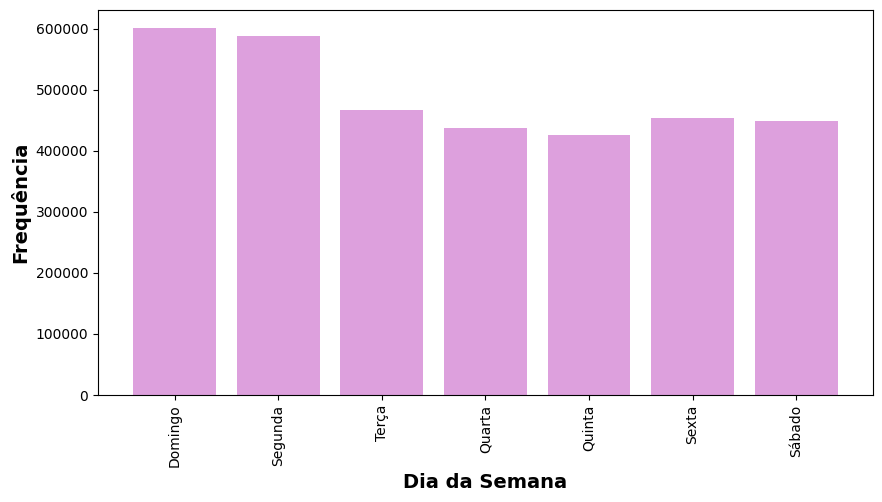

In [56]:
# Plot
plt.figure(figsize = (10,5))
plt.bar(dias_semana,total_pedidos, color = 'plum')
plt.xlabel('Dia da Semana', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequência', fontsize = 14, fontweight = 'bold')
plt.xticks(dias_semana,['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'], rotation = 'vertical')
plt.show()

3) QUAL HORA DO DIA TEM O MAIOR NÚMERO DE PEDIDOS?

In [57]:
df_orders.groupBy(F.col('order_hour_of_day')).agg(F.count('order_hour_of_day').alias('qtd_pedidos')).orderBy(F.col('qtd_pedidos').desc()).show()

+-----------------+-----------+
|order_hour_of_day|qtd_pedidos|
+-----------------+-----------+
|               10|     288418|
|               11|     284728|
|               15|     283639|
|               14|     283042|
|               13|     277999|
|               12|     272841|
|               16|     272553|
|                9|     257812|
|               17|     228795|
|               18|     182912|
|                8|     178201|
|               19|     140569|
|               20|     104292|
|                7|      91868|
|               21|      78109|
|               22|      61468|
|               23|      40043|
|                6|      30529|
|                0|      22758|
|                1|      12398|
+-----------------+-----------+
only showing top 20 rows



In [58]:
lista_horas = list(range(0, 24))
qtd_pedidos = []

for i in range(24):
  qtd_pedidos.append(df_orders.filter(F.col('order_hour_of_day') == i).count())

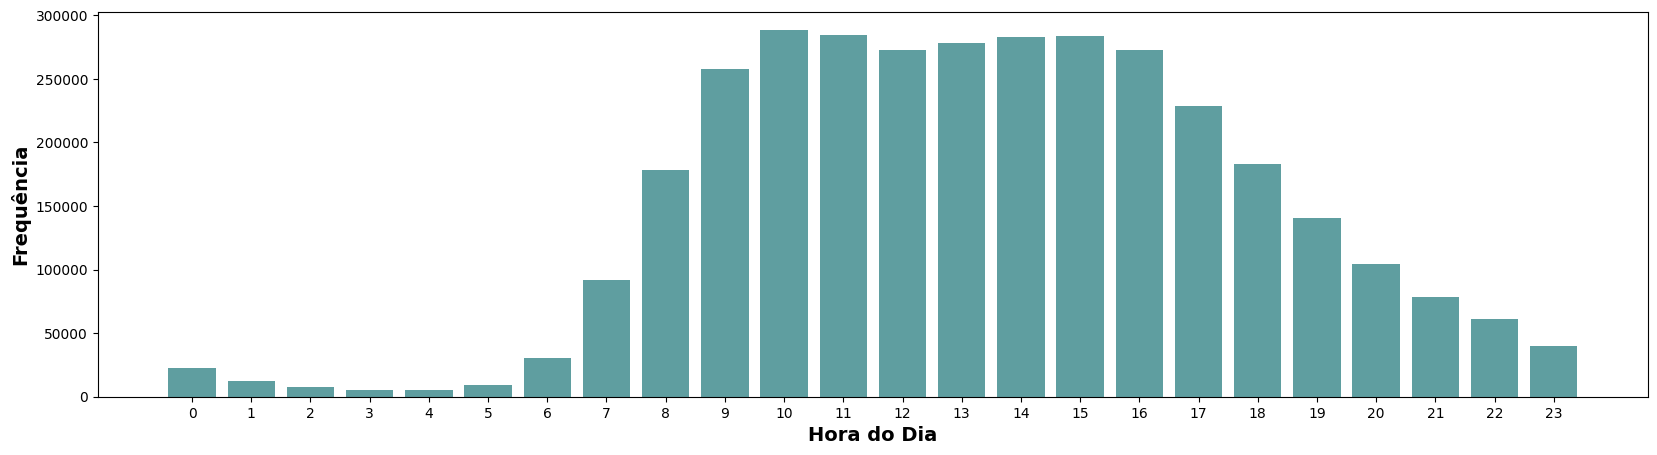

In [59]:
# Plot
plt.figure(figsize = (20,5))
plt.bar(lista_horas,qtd_pedidos,color = 'cadetblue')
plt.xticks(np.arange(0,24,1))
plt.xlabel('Hora do Dia', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequência', fontsize = 14, fontweight = 'bold')
plt.show()

4) QUAL O DEPARTAMENTO TEM O MAIOR NÚMERO DE PEDIDOS?

In [60]:
df_join_table = df_order_product_prior.join(df_orders, on=['order_id'], how='left')\
  .join(df_products, on=['product_id'], how='left')\
  .join(df_aisles, on=['aisle_id'], how='left')\
  .join(df_departments, on=['department_id'], how='left')

In [61]:
df_join_table\
  .groupBy(F.col('department'))\
  .agg(F.countDistinct('order_id').alias('qtd_pedidos'))\
  .orderBy(F.col('qtd_pedidos').desc()).show()

+---------------+-----------+
|     department|qtd_pedidos|
+---------------+-----------+
|        produce|    2409320|
|     dairy eggs|    2177338|
|      beverages|    1457351|
|         snacks|    1391447|
|         frozen|    1181018|
|         pantry|    1117892|
|         bakery|     881556|
|           deli|     770300|
|   canned goods|     681305|
|dry goods pasta|     597862|
|   meat seafood|     574731|
|      breakfast|     525188|
|      household|     470779|
|  personal care|     318555|
|  international|     221537|
|         babies|     177712|
|        alcohol|      84689|
|        missing|      59477|
|           pets|      59282|
|          other|      35056|
+---------------+-----------+
only showing top 20 rows



5 - QUAIS OS 20 PRINCIPAIS CORREDORES POR FREQUÊNCIA DE PEDIDOS?

In [62]:
df_join_table\
  .groupBy(F.col('aisle'))\
  .agg(F.countDistinct('order_id').alias('qtd_pedidos'))\
  .orderBy(F.col('qtd_pedidos').desc()).show(20)

+--------------------+-----------+
|               aisle|qtd_pedidos|
+--------------------+-----------+
|        fresh fruits|    1790771|
|    fresh vegetables|    1427631|
|packaged vegetabl...|    1179243|
|              yogurt|     847081|
|                milk|     785987|
|     packaged cheese|     737899|
|water seltzer spa...|     614081|
|     soy lactosefree|     545714|
|      chips pretzels|     538052|
|               bread|     527129|
|                eggs|     440410|
|        refrigerated|     429510|
|      frozen produce|     395743|
|            crackers|     368577|
|       ice cream ice|     352768|
|          lunch meat|     334151|
|fresh dips tapenades|     314910|
|         fresh herbs|     300364|
|              cereal|     297307|
|               cream|     295032|
+--------------------+-----------+
only showing top 20 rows



6 - QUAIS OS 20 PRINCIPAIS PRODUTOS POR FREQUÊNCIA DE PEDIDOS?

In [64]:
df_join_table\
  .groupBy(F.col('product_name'))\
  .agg(F.countDistinct('order_id').alias('qtd_pedidos'))\
  .orderBy(F.col('qtd_pedidos').desc()).show(20)

+--------------------+-----------+
|        product_name|qtd_pedidos|
+--------------------+-----------+
|              Banana|     472565|
|Bag of Organic Ba...|     379450|
|Organic Strawberries|     264683|
|Organic Baby Spinach|     241921|
|Organic Hass Avocado|     213584|
|     Organic Avocado|     176815|
|         Large Lemon|     152657|
|        Strawberries|     142951|
|               Limes|     140627|
|  Organic Whole Milk|     137905|
| Organic Raspberries|     137057|
|Organic Yellow Onion|     113426|
|      Organic Garlic|     109778|
|    Organic Zucchini|     104823|
| Organic Blueberries|     100060|
|      Cucumber Kirby|      97315|
|  Organic Fuji Apple|      89632|
|       Organic Lemon|      87746|
|Apple Honeycrisp ...|      85020|
|Organic Grape Tom...|      84255|
+--------------------+-----------+
only showing top 20 rows



7 - ANÁLISE DE NOVOS PEDIDOS SEMELHANTES A PEDIDOS ANTERIORES (reorder)

In [65]:
df_join_table\
  .groupBy(F.col('order_id'))\
  .agg(F.count(F.col('reordered')).alias('pedidos_feitos'),F.count(F.when(F.col('reordered') == 1, True)).alias('pedidos_refeitos'))\
  .orderBy(F.col('pedidos_feitos').desc(),F.col('pedidos_refeitos').desc()).show(20)

+--------+--------------+----------------+
|order_id|pedidos_feitos|pedidos_refeitos|
+--------+--------------+----------------+
| 1564244|           145|              80|
|  790903|           137|             130|
|   61355|           127|               4|
| 1992780|           124|              52|
| 1991701|           124|              50|
| 2970392|           121|              85|
| 1991083|           118|              88|
| 2069920|           116|             107|
| 3308010|           115|             114|
| 1991596|           114|              96|
| 2753324|           114|              42|
| 2499774|           112|              97|
| 1994250|           112|               0|
| 2621625|           109|              98|
|   77151|           109|              63|
| 1657096|           108|             101|
| 2136777|           108|              55|
| 1991706|           106|              94|
| 2648316|           105|              51|
| 1892299|           104|              82|
+--------+-

8 - ANÁLISE DE RECOMPRA(reorder) POR DEPARTAMENTO AO LONGO DO TEMPO

In [66]:
df_join_table\
  .groupBy(F.col('order_dow'), F.col('department'))\
  .agg(F.count(F.when(F.col('reordered') == 1, True)).alias('pedidos_refeitos'))\
  .orderBy(F.col('pedidos_refeitos').desc(), F.col('order_dow').asc()).show(20)

+---------+----------+----------------+
|order_dow|department|pedidos_refeitos|
+---------+----------+----------------+
|        0|   produce|         1260369|
|        1|   produce|         1106865|
|        6|   produce|          855582|
|        5|   produce|          780666|
|        2|   produce|          779142|
|        3|   produce|          696666|
|        4|   produce|          691990|
|        0|dairy eggs|          676672|
|        1|dairy eggs|          654677|
|        5|dairy eggs|          484258|
|        6|dairy eggs|          483074|
|        2|dairy eggs|          476445|
|        3|dairy eggs|          429723|
|        4|dairy eggs|          428786|
|        1| beverages|          327532|
|        1|    snacks|          324180|
|        0| beverages|          279928|
|        0|    snacks|          274975|
|        5| beverages|          247211|
|        2| beverages|          244375|
+---------+----------+----------------+
only showing top 20 rows



9 - ANÁLISE DE REORDER E PEDIDOS - Pessoas que compram determinado produto e compram novamente.

In [69]:
df_join_table\
  .groupBy(F.col('user_id'))\
  .agg(F.count(F.col('reordered')).alias('pedidos_feitos'),F.count(F.when(F.col('reordered') == 1, True)).alias('pedidos_refeitos'))\
  .orderBy(F.col('pedidos_feitos').desc(),F.col('pedidos_refeitos').desc()).show(20)

+-------+--------------+----------------+
|user_id|pedidos_feitos|pedidos_refeitos|
+-------+--------------+----------------+
| 201268|          3725|            3275|
| 129928|          3638|            3167|
| 164055|          3061|            2657|
| 186704|          2961|            2578|
| 137629|          2924|            2642|
| 176478|          2921|            2429|
| 182401|          2907|            2181|
|  33731|          2888|            2397|
|   4694|          2781|            2232|
| 108187|          2760|            2446|
|  79106|          2631|            2220|
|  17738|          2596|            2227|
|  60694|          2579|            2059|
|   5360|          2561|            2224|
|  13701|          2547|            2129|
|  72136|          2517|            2185|
| 181991|          2463|            2169|
|  57546|          2445|            2280|
|  23832|          2429|            2156|
|  52008|          2386|            1987|
+-------+--------------+----------

10) ANÁLISE DE REORDER POR CORREDOR 

In [70]:
df_join_table\
  .groupBy(F.col('aisle'))\
  .agg(F.count(F.when(F.col('reordered') == 1, True)).alias('pedidos_refeitos'))\
  .orderBy(F.col('pedidos_refeitos').desc()).show(20)

+--------------------+----------------+
|               aisle|pedidos_refeitos|
+--------------------+----------------+
|        fresh fruits|         2620027|
|    fresh vegetables|         2035567|
|packaged vegetabl...|         1129116|
|              yogurt|          998775|
|                milk|          697484|
|water seltzer spa...|          615117|
|     packaged cheese|          574427|
|     soy lactosefree|          442778|
|      chips pretzels|          426154|
|               bread|          392638|
|        refrigerated|          382619|
|                eggs|          319478|
|      frozen produce|          283568|
| energy granola bars|          273380|
|            crackers|          261638|
|       ice cream ice|          245830|
|          lunch meat|          240078|
|         soft drinks|          228795|
|   baby food formula|          226153|
|               cream|          218235|
+--------------------+----------------+
only showing top 20 rows



11 - ANÁLISE DE REORDER POR CORREDOR - Total de Reorder por Corredor de Produtos Conseguimos ver os corredores que menos tiverem novos pedidos, e aqueles que tiveram mais novos pedidos.

In [71]:
df_join_table\
  .groupBy(F.col('aisle'))\
  .agg(F.count(F.when(F.col('reordered') == 1, True)).alias('pedidos_refeitos'))\
  .orderBy(F.col('pedidos_refeitos').desc()).show(20)

+--------------------+----------------+
|               aisle|pedidos_refeitos|
+--------------------+----------------+
|        fresh fruits|         2620027|
|    fresh vegetables|         2035567|
|packaged vegetabl...|         1129116|
|              yogurt|          998775|
|                milk|          697484|
|water seltzer spa...|          615117|
|     packaged cheese|          574427|
|     soy lactosefree|          442778|
|      chips pretzels|          426154|
|               bread|          392638|
|        refrigerated|          382619|
|                eggs|          319478|
|      frozen produce|          283568|
| energy granola bars|          273380|
|            crackers|          261638|
|       ice cream ice|          245830|
|          lunch meat|          240078|
|         soft drinks|          228795|
|   baby food formula|          226153|
|               cream|          218235|
+--------------------+----------------+
only showing top 20 rows

